In [1]:

# Step 1: Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# Step 2: Create and connect to SQLite DB
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()



In [3]:
# Step 3: Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")




In [4]:
# Step 4: Insert sample data
sample_data = [
    ("Laptop", 5, 700),
    ("Laptop", 3, 720),
    ("Mouse", 10, 25),
    ("Mouse", 15, 20),
    ("Keyboard", 7, 45),
    ("Keyboard", 4, 50),
    ("Monitor", 2, 150),
    ("Monitor", 3, 160)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()



In [5]:
# Step 5: Run SQL query for sales summary
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

# Step 6: Print results
print("=== Sales Summary ===")
print(df)



=== Sales Summary ===
    product  total_qty  revenue
0  Keyboard         11    515.0
1    Laptop          8   5660.0
2   Monitor          5    780.0
3     Mouse         25    550.0


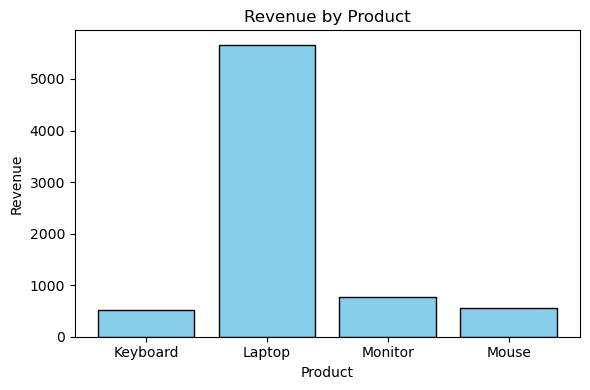

In [6]:
# Step 7: Plot bar chart for revenue by product
plt.figure(figsize=(6, 4))
plt.bar(df['product'], df['revenue'], color='skyblue', edgecolor='black')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Revenue by Product')
plt.tight_layout()
plt.savefig("sales_chart.png")  # Save the chart
plt.show()

# Step 8: Close connection
conn.close()